# Titanic survival Prediction 


In [1]:
#import the required packages or libraries or dependencies
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv(r"D:\datasets\titanic\train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## statastical information of numerical columns

In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.shape

(891, 12)

In [5]:
#getting information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
#check the missing values 
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
#handling missing values
#Most of the values are missing in column cabin , we need to remove that cabin column for high missing values
df=df.drop(columns='Cabin',axis=1)
#replace age missing values with mean value    #inplace is used for only particular column
df['Age'].fillna(df['Age'].mean(), inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [8]:
#replce values with mode by repeating values in Embark column
df['Embarked'].mode()[0]

'S'

In [9]:
#S = Southampton is most repeating value 
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Data analysis and visualization

In [10]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

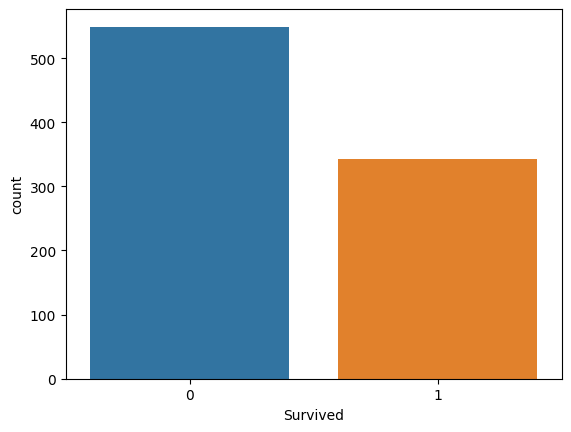

In [11]:
sns.countplot(x='Survived', data=df)
plt.show()

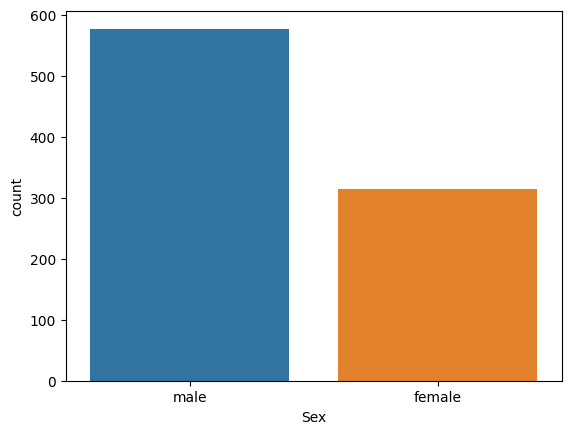

In [12]:
sns.countplot(x='Sex', data=df)
plt.show()

In [13]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

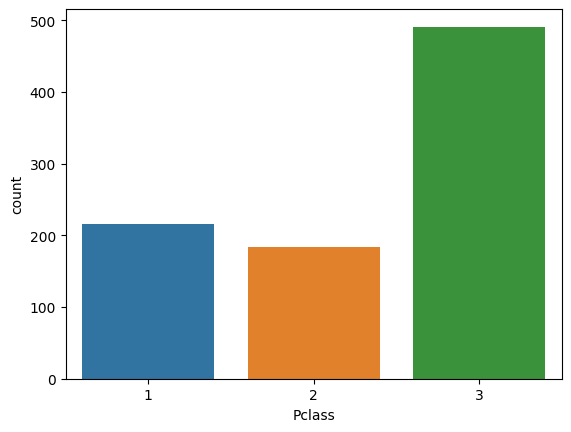

In [14]:
sns.countplot(x='Pclass', data=df)
plt.show()

In [15]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

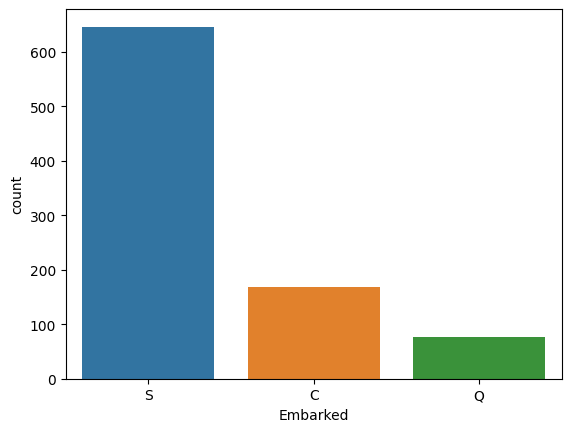

In [16]:
sns.countplot(x='Embarked', data=df)
plt.show()

In [17]:
df['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

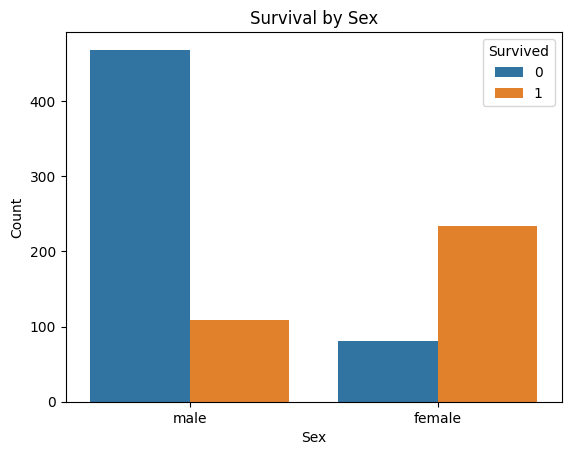

In [18]:
# number of survival based on gender
sns.countplot(x='Sex', hue='Survived', data=df)
# Add labels and title
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Survival by Sex')
# Show the plot
plt.show()

#In this gender wise survival , womens are around 240 survived ,mens are around 100 are survived . even though mens are higher number in dataset but womens only have high surviuval than mens . This is the most important insights . In this titanic accident womens are first priorty to save

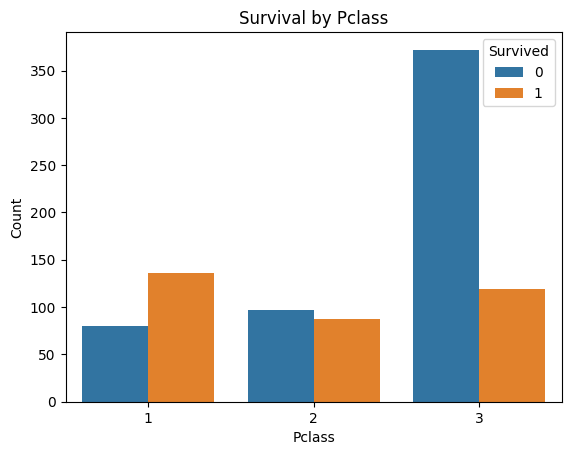

In [19]:
#survival count based on passenger class
sns.countplot(x='Pclass', hue='Survived', data=df)
# Add labels and title
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Survival by Pclass')
# Show the plot
plt.show()

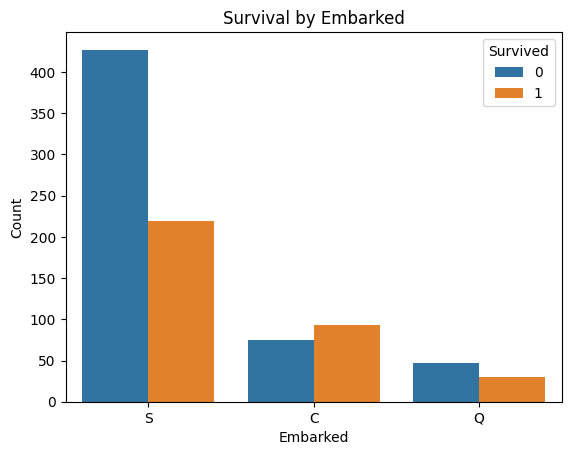

In [20]:
sns.countplot(x='Embarked', hue='Survived', data=df)
# Add labels and title
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Survival by Embarked')
# Show the plot
plt.show()

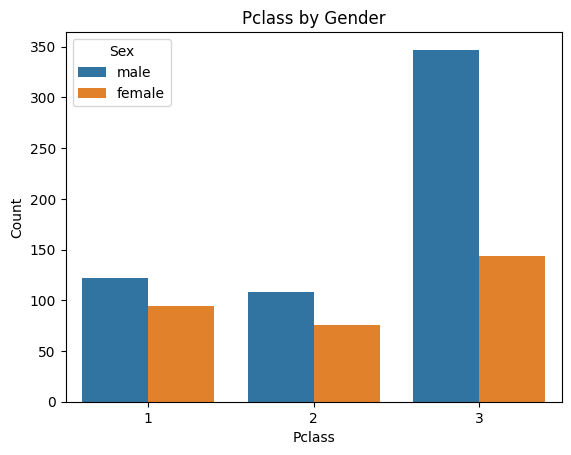

In [21]:
sns.countplot(x='Pclass', hue='Sex', data=df)
# Add labels and title
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Pclass by Gender')
# Show the plot
plt.show()

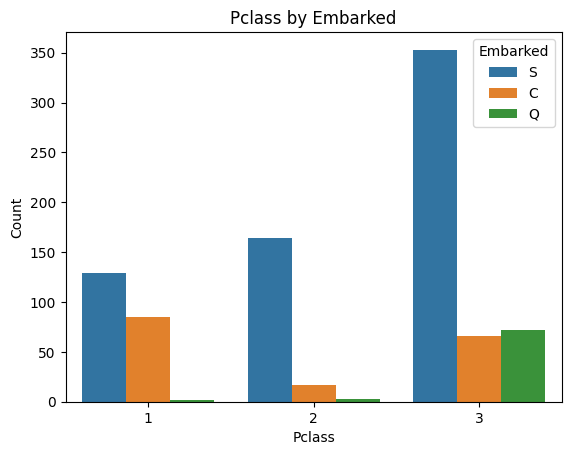

In [22]:
sns.countplot(x='Pclass', hue='Embarked', data=df)
# Add labels and title
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.title('Pclass by Embarked')
# Show the plot
plt.show()

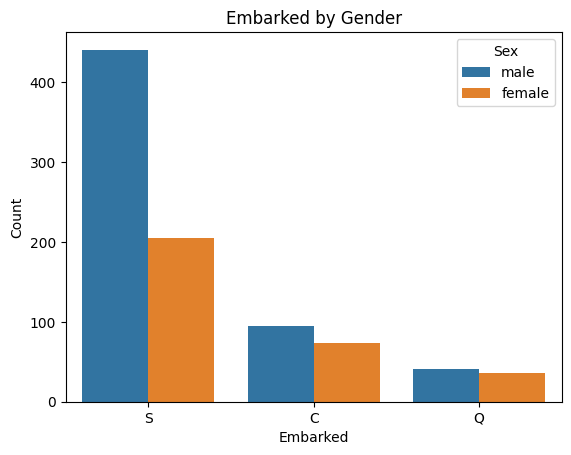

In [23]:
sns.countplot(x='Embarked', hue='Sex', data=df)
# Add labels and title
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.title('Embarked by Gender')
# Show the plot
plt.show()

D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of Age')

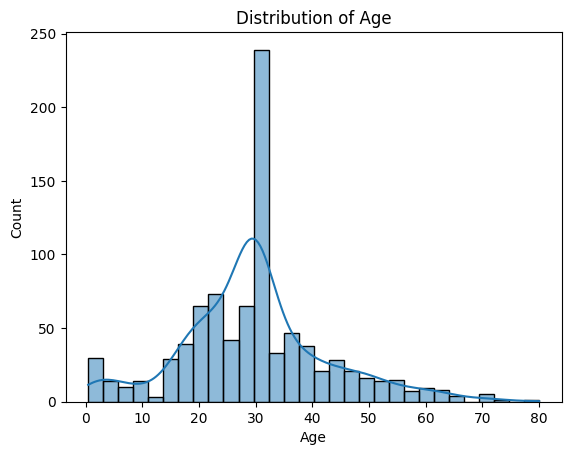

In [24]:
sns.histplot(data=df, x="Age", kde=True, bins=30)

# Add labels and title
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Distribution of Age")


D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of fare')

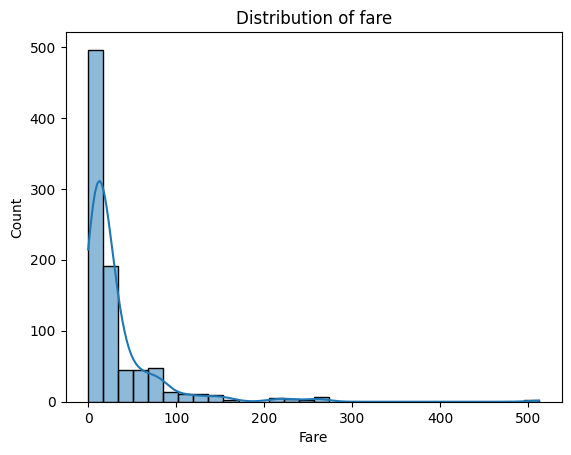

In [25]:
sns.histplot(data=df, x="Fare", kde=True, bins=30)

# Add labels and title
plt.xlabel("Fare")
plt.ylabel("Count")
plt.title("Distribution of fare")


D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


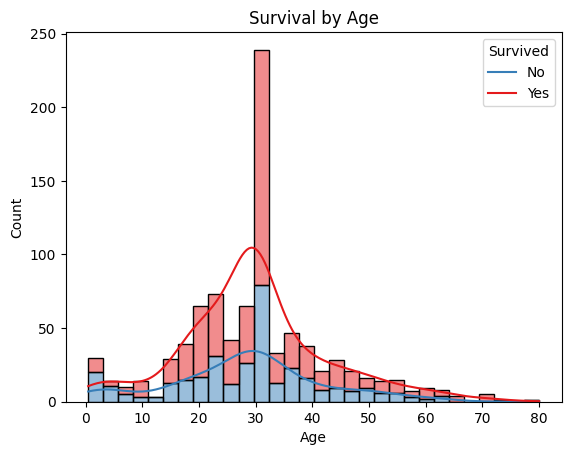

In [26]:
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack', bins=30, kde=True, palette='Set1')

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Survival by Age')
plt.legend(title='Survived', labels=['No', 'Yes'])

## Feature selection

In [27]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [28]:
#we need to drop PassengerId and Name column because its useless for training 
df = df.drop(['PassengerId', 'Name'], axis=1)
df = df.drop(['Ticket'],axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [29]:
#encode the categorical colums 
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Encode the 'Sex' column
df['Sex'] = le.fit_transform(df['Sex'])

# Encode the 'Embarked' column
df['Embarked'] = le.fit_transform(df['Embarked'])
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


In [30]:
# train test split     select survuved column as target column
# Split the data into features (X) and target (y)
X = df.drop('Survived', axis=1)
y = df['Survived']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

Training set size: 712
Test set size: 179


In [31]:
# Print the shapes of X and y
print("Shape of X (features):", X.shape)
print("Shape of X_train (training features):", X_train.shape)
print("Shape of X_test (test features):", X_test.shape)
print("Shape of y (target):", y.shape)
print("Shape of y_train (training target):", y_train.shape)
print("Shape of y_test (test target):", y_test.shape)

Shape of X (features): (891, 7)
Shape of X_train (training features): (712, 7)
Shape of X_test (test features): (179, 7)
Shape of y (target): (891,)
Shape of y_train (training target): (712,)
Shape of y_test (test target): (179,)


Target column is Binary classification and ordinal . so we should use Logistic regression for Model training 

In [32]:
# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)


LogisticRegression()

In [33]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0], dtype=int64)

In [34]:
test_accuracy_score=accuracy_score(y_test,y_pred)
test_accuracy_score

0.8044692737430168

In [35]:
print("Accuracy percentage : ",test_accuracy_score*100)

Accuracy percentage :  80.44692737430168


Accuracy is 80% . It is good model for prediction 

In [36]:
# Create a new DataFrame for the new customer
data = {'Pclass': 1, 'Sex': 0, 'Age': 20, 'SibSp': 1, 'Parch': 0, 'Fare': 100.0, 'Embarked': 3}
cust_df = pd.DataFrame(data, index=[0])

pred=model.predict(cust_df)
print(pred)
if pred==0:
    print("Not Survived")
else:
    print("Survived")
# Make a prediction using the trained model
prediction = model.predict_proba(cust_df)[:, 1]

print(f"Survival probability for the person: {prediction[0]:.2f}")

[1]
Survived
Survival probability for the person: 0.92


In [37]:
# Create a new DataFrame for the new customer
data = {'Pclass': 3, 'Sex': 1, 'Age': 20, 'SibSp': 1, 'Parch': 0, 'Fare': 100.0, 'Embarked': 3}
cust_df = pd.DataFrame(data, index=[0])

pred=model.predict(cust_df)
print(pred)
if pred==0:
    print("Not Survived")
else:
    print("Survived")
# Make a prediction using the trained model
prediction = model.predict_proba(cust_df)[:, 1]

print(f"Survival probability for the person: {prediction[0]:.2f}")

[0]
Not Survived
Survival probability for the person: 0.10


## saving the model

In [38]:
import pickle
filename='trained_model.sav'
pickle.dump(model, open(filename,'wb'))

In [39]:
loaded_model=pickle.load(open('trained_model.sav','rb'))

In [45]:
# Create a new DataFrame for the new customer
data = {'Pclass': 3, 'Sex': 1, 'Age': 20, 'SibSp': 1, 'Parch': 0, 'Fare': 100.0, 'Embarked': 3}
cust_df = pd.DataFrame(data, index=[0])

pred=loaded_model.predict(cust_df)
print(pred)
if pred==0:
    print("Not Survived")
else:
    print("Survived")
# Make a prediction using the trained model
prediction = model.predict_proba(cust_df)[:, 1]
percent = prediction[0] * 100
print(f"Survival probability for the person: {percent:.2f}%")

[0]
Not Survived
Survival probability for the person: 9.97%
